# CS7324 - Lab 1 Report
Prepared by Zech Wolf

## 1. Business Understanding

Strokes are bad and people don't like it when they have them. What if you could predict if a person was at risk for a stroke? big money

Dataset source: https://www.kaggle.com/datasets/fedesoriano/stroke-prediction-dataset 

## 2. Data Understanding

### 2.1 Attributes and data types

The dataset consists of 5110 observations, each representing an individual patient. The features include basic health information about the patient, such as age, BMI, sex, etc. The target variable is whether or not the patient has experienced a stroke.

In [25]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("datasets/healthcare-dataset-stroke-data.csv")
df.rename(columns={"Residence_type": "residence_type"}, inplace=True) #change the name of residence column to fit naming conventions
df.drop(columns=["id"], inplace=True) #drop id column for now
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             5110 non-null   object 
 1   age                5110 non-null   float64
 2   hypertension       5110 non-null   int64  
 3   heart_disease      5110 non-null   int64  
 4   ever_married       5110 non-null   object 
 5   work_type          5110 non-null   object 
 6   residence_type     5110 non-null   object 
 7   avg_glucose_level  5110 non-null   float64
 8   bmi                4909 non-null   float64
 9   smoking_status     5110 non-null   object 
 10  stroke             5110 non-null   int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 439.3+ KB


,gender,age,hypertension,heart_disease,ever_married,work_type,residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


#### Nominal features

There are eleven attributes in the dataset that will be important for analysis ("id" field can be ignored for now as it does not contain any information relevant to the patient's health). There are several nominal attributes in the dataset:

* hypertension
* heart_disease
* ever_married
* work_type
* residence_type

For this analysis, it will be suitable to leave these features as integers in the case of "yes/no" type values, and as pandas objects (strings) for the others. To prepare for any machine learning tasks in the future though, it would be best to represent all nominal features using a one hot encoding scheme or hash function encoding.

#### Ordinal feature

This dataset has one ordinal feature - age. The age of the patients will be stored as an integer

#### Ratio features

The remaining features are continuous ratio variables:

* avg_glucose_level
* bmi

These features will be stored as floats

#### Summary

### 2.2 Data Quality

Out of the 5110 samples, 201 of them are missing a BMI measurement. The dataset source does not seem to mention why these values are not recorded. According to the CDC [1], body mass index is calculated as:

$BMI = \frac{m}{h^2}$   where m = mass in kg, and h = height in meters

It's possible that the patient's weight or height was not recorded, meaning BMI would not be possible to calculate. Height and weight are not provided in the dataset so it is difficult to say for sure. Looking at the samples where BMI is missing may reveal similarities between such patients.

[1] https://www.cdc.gov/healthyweight/assessing/bmi/adult_bmi/index.html 

0

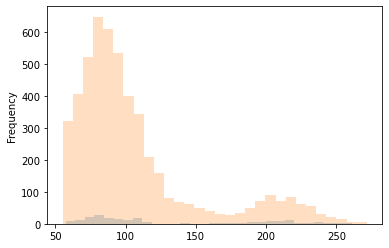

In [28]:
bmi_missing = df[df["bmi"].isnull()]
bmi_missing.avg_glucose_level.plot(kind="hist", alpha=0.25, bins=30)
df.avg_glucose_level.plot(kind="hist", alpha=0.25, bins=30)

While there are no missing values for the smoking_status attribute, there is a significant number of patients (about one fifth of samples) whose smoking status is designated as "Unknown." 

In [13]:
df[df.smoking_status == "Unknown"].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1544 entries, 8 to 5109
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             1544 non-null   object 
 1   age                1544 non-null   float64
 2   hypertension       1544 non-null   int64  
 3   heart_disease      1544 non-null   int64  
 4   ever_married       1544 non-null   object 
 5   work_type          1544 non-null   object 
 6   residence_type     1544 non-null   object 
 7   avg_glucose_level  1544 non-null   float64
 8   bmi                1483 non-null   float64
 9   smoking_status     1544 non-null   object 
 10  stroke             1544 non-null   int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 144.8+ KB
